# ***Project Titel:- internship Project - 🚗Automobile Imports Price***

## Business Case:-

* You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# ***Problem Statements And Goals***

## **Problem Statements**

**task1**:-Create a predictive model for car prices using available independent variables.

## **Goal :**

* To develop a predictive model that accurately estimates car prices based on various independent variables.

#  **Dataset Source And Description** :

- **Source** : Institute
- **Rows** : 201
- **Columns** : 26
- **Traget Variable** :Price
- **Features** : Mixture of numerical and Categorical Variable
- **Description**This dataset contains information about various automobiles, including their technical specifications, engine features, fuel details, and prices.
It is used to analyze the factors that influence a car’s price or to build a predictive model for price estimation.

The dataset is a mixture of numerical and categorical variables.

#  **Imports and Configurations**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install xgboost

In [3]:
df = pd.read_csv("auto_imports.csv")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# **Rename Columns**

In [4]:
columns_name = [ "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"]

In [5]:
df = pd.read_csv("auto_imports.csv",header = None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.columns = columns_name

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# **Domain Analysis**

- **Symboling:**
  Numerical
  Indicates the insurance risk rating of the car (−3 = safest, +3 = risky).

--  **Normalized-losses**
  Numerical
  Represents the average insurance loss payment per insured car.

- **Make**
  Categorical
  The brand or manufacturer of the car (e.g., Toyota, BMW, Honda)

- **Fuel-type**
  Categorical
  Type of fuel used by the car — gas or diesel.

- **Aspiration**
  Categorical
  Engine aspiration: standard (normal air intake) or turbo (forced air intake).

- **Num-Of-Doors**
  Categorical
  Number of doors — two or four.

- **Body-style**
  Categorical
  Design or shape of the car — sedan, hatchback, convertible, etc.

- **Drive-wheels**
  Categorical
  Which wheels drive the car — front (fwd), rear (rwd), or 4-wheel (4wd).

- **Engine-Location**
  Categorical
  Location of the engine — front or rear.

- **Wheel-base**
   Numerical
   Distance between front and rear wheels (in inches).

- **Length**
  Numerical
  Overall length of the car (in inches).

- **Width**
  Numerical
  Width of the car (in inches).

- **Height**
  Numerical
  Height of the car (in inches).

- **Curb-weight**
  Numerical
  Weight of the car without passengers or cargo (in pounds).

- **engine-Type**
  Categorical
  Configuration of the engine — dohc, ohcv, rotor, etc.

- **Num-Of-Cylinders**
  Categorical
  Number of cylinders in the engine (three, four, six, etc.).

- **Engine-Size**
  Numerical
  Engine displacement measured in cubic centimeters (cc).

- **Fuel-System**
  Categorical
  Type of fuel delivery system — mpfi, 2bbl, idi, etc.

- **Bore**
  Numerical
  Diameter of the engine cylinder.

- **Stroke**
  Numerical
  Movement of piston inside cylinder.

- **Compression-Ratio**
  Numerical
  Ratio of engine cylinder volume when piston is down vs. up.

- **Horsepower**
  Numerical
  Engine power output.

- **Peak-Rpm**
  Numerical
  Maximum revolutions per minute of the engine.

- **City-Mpg**
  Numerical
  Fuel efficiency in city driving (miles per gallon).

- **Highway-Mpg**
  Numerical
  Fuel efficiency on highway driving (miles per gallon).

- **Price**
  Numerical(Target Variable)
  Selling price of the car in USD.
  

# **Basic Check**

In [9]:
pd.set_option('display.max_rows', None) ## displaying all rows

In [10]:
df.shape 

(201, 26)

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

**Insights**

- Total Number of Row : 200
- Total Number of features : 26
- Number of features (int64 + float64) : 11
- Categorical Features : 15
- There are incorect values some of dataseat and we will hendel in feature engineering section  

In [13]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


* **insights**
   - The dataset includes a wide variety of cars, from big, potent luxury vehicles to small, light, fuel-efficient models.

   - The three main factors that affect a vehicle's cost—price, engine size, and curb weight—variably vary greatly.


   - The length, width, and height, on the other hand, show little variation because most cars follow the same body proportions.


In [14]:
df.describe(include = 'O').T

,count,unique,top,freq
normalized-losses,201,52,?,37
make,201,22,toyota,32
fuel-type,201,2,gas,181
aspiration,201,2,std,165
num-of-doors,201,3,four,113
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-location,201,2,front,198
engine-type,201,6,ohc,145
num-of-cylinders,201,7,four,157


* **insights**
  - Dataset has mixed categorical and numeric columns (some numeric stored as text).

  - Most cars are gasoline, front-engine, 4-cylinder sedans from brands like Toyota.

  - Columns like normalized-losses, bore, stroke, horsepower, peak-rpm need data cleaning (type conversion and missing value handling).

# **EDA Exploratory Data Analysis**

# ***Univariate Analysis***

In [15]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=['object']).columns

print('numeric columns: \n', num_cols)
print('categorical columns: \n', cat_cols)

numeric columns: 
 Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
categorical columns: 
 Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')


# ***Numerical column Univariate Analysis***

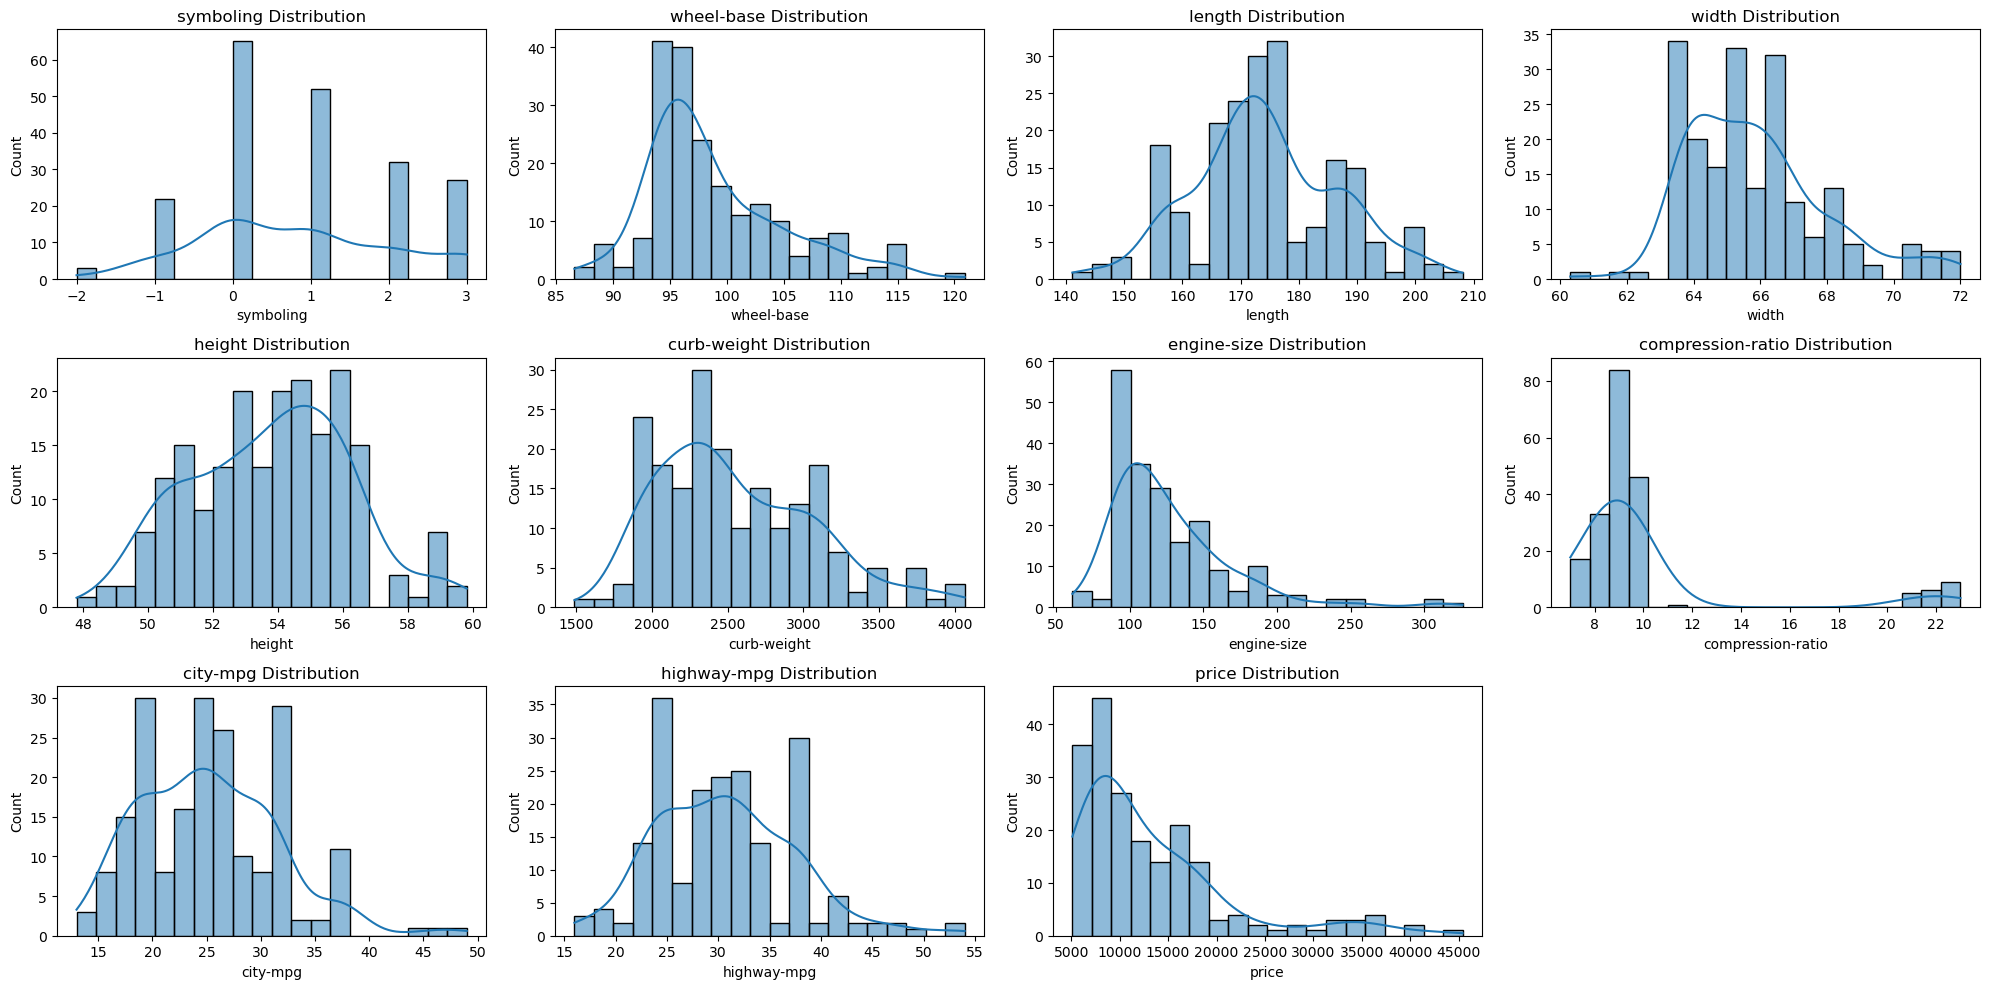

In [16]:
pltn = 1
plt.figure(figsize=(20,10))

for col in num_cols:
    plt.subplot(3,4,pltn)
    sns.histplot(df[col],kde=True,bins=20)
    plt.title(f'{col} Distribution')
    pltn = pltn + 1
plt.tight_layout()
plt.show()

# **ingsinghts***
- Symbolizing represents risk rating, most cars fall in neutral or safe zones, with few high-risk designsalso included
- Majority of cars have standard wheel-base, while some luxury models have extended bases for stability
- Most vehicles are mid-sized sedans only a few are long luxury cars
- Width is consistent for most cars few premium vehicles are wider than 70 inches
- Height shows little variation most cars fall in a uniform size category
- Majority are lightweight to mid-weight cars heavier vehicles belong to luxury or performance segments
- Dataset dominated by compact engines only few cars have large, high-performance engines
- Typical compression ratios cluster around 9 very high ratios belong to sports/high-efficiency engines
- Most cars give moderate mileage few highly efficient small cars achieve 40+ mpg
- Highway mileage generally higher than city, following expected pattern
- Most cars priced between ₹5k–₹15k, with few luxury outliers up to ₹45k

# ***Categorical Univariate Analysis***

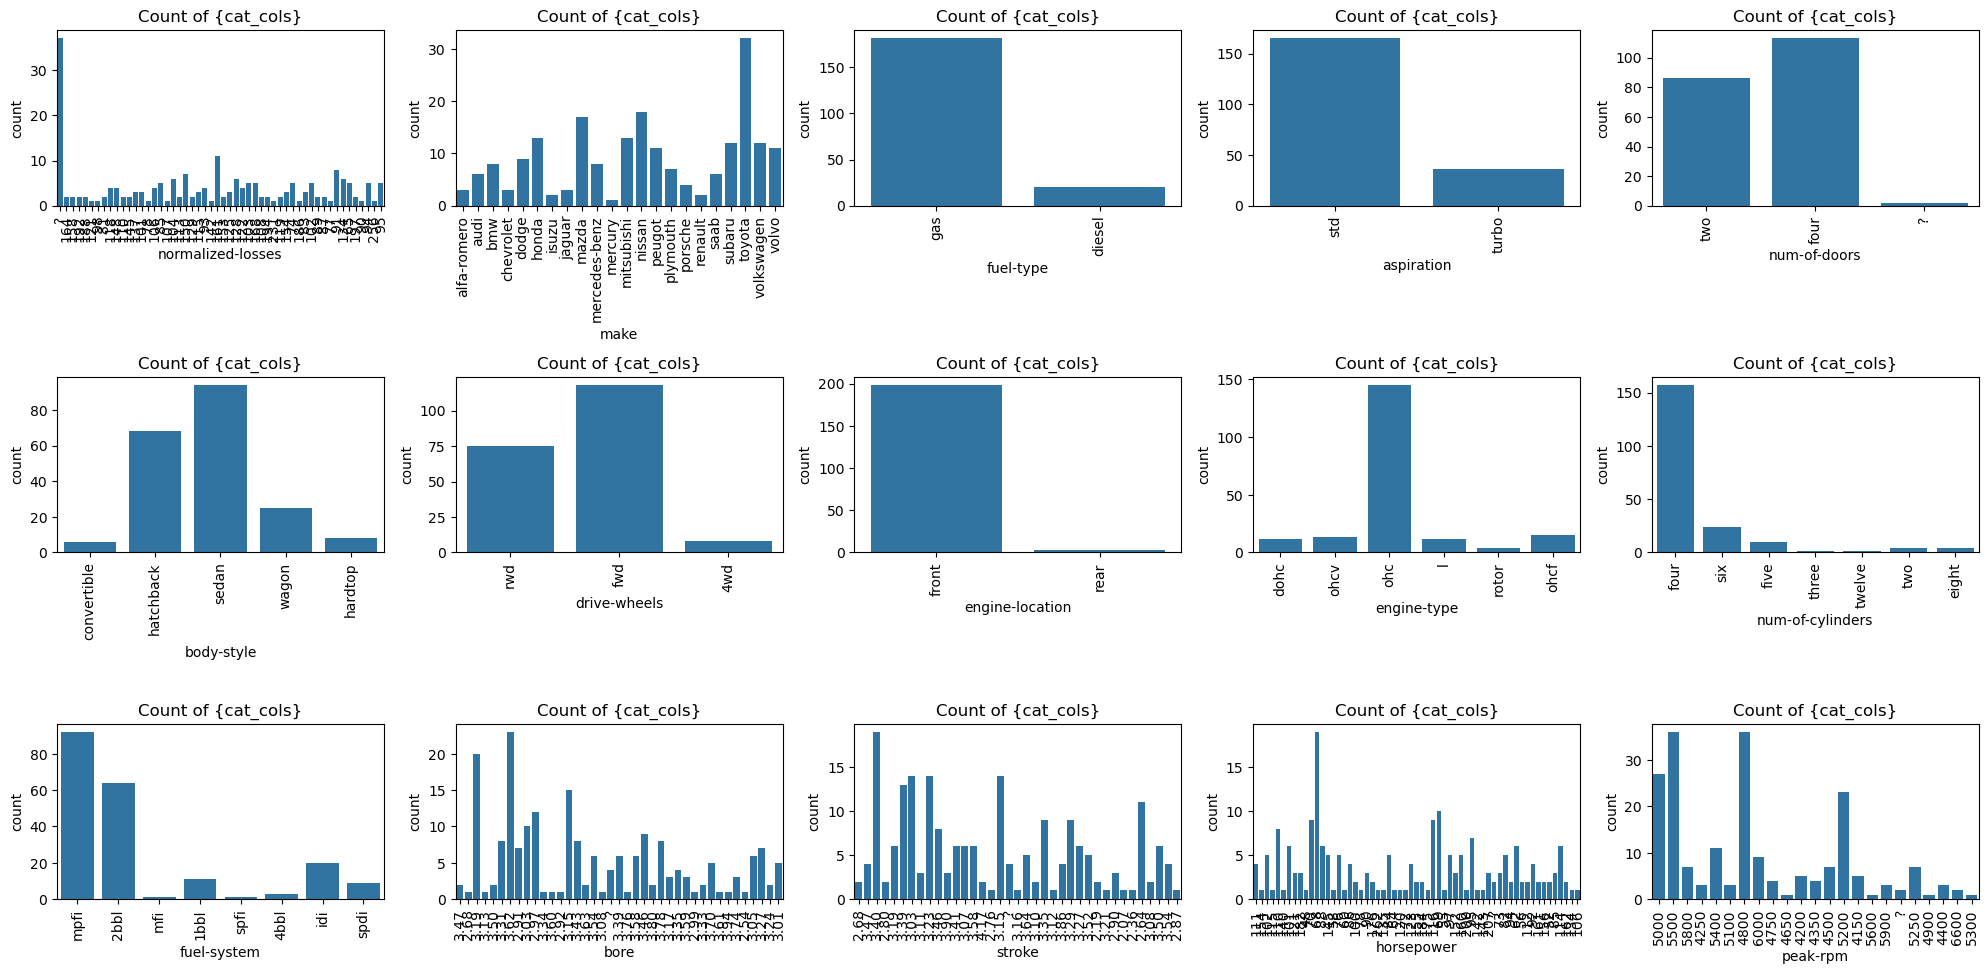

In [17]:
plt.figure(figsize=(20,30))
plot = 1

for i in cat_cols:
    if plot <= 43:
        plt.subplot(9, 5, plot)
        sns.countplot( x=i, data=df)
        plt.title('Count of {cat_cols}',)
        plt.xticks(rotation=90)
        plot += 1
        
plt.tight_layout()
plt.show()

# *Insight*
- The majority of the Japanese automobiles in the sample are mid-range models.

- The dataset has a strong bias in favor of gas-powered vehicles.

- Cars with turbochargers are rather uncommon.

- Sedans, or four-door vehicles, predominate; these are useful, family-friendly versions.

- Regular passenger cars make up the majority of the dataset.

- The majority of cars, especially the more affordable models, have front-wheel drive.

- Cars with rear engines are incredibly uncommon.

- OHC engines, which are prevalent in mass-market automobiles, power the majority of cars.

- Small and medium-sized engines, not high-performance vehicles, make up the majority of the dataset.

- Carbureted systems (1bbl/2bbl) are less popular in modern autos.

- For accurate analysis, these columns need to be translated to numbers.




# **Numerical Bivariate Analysis**

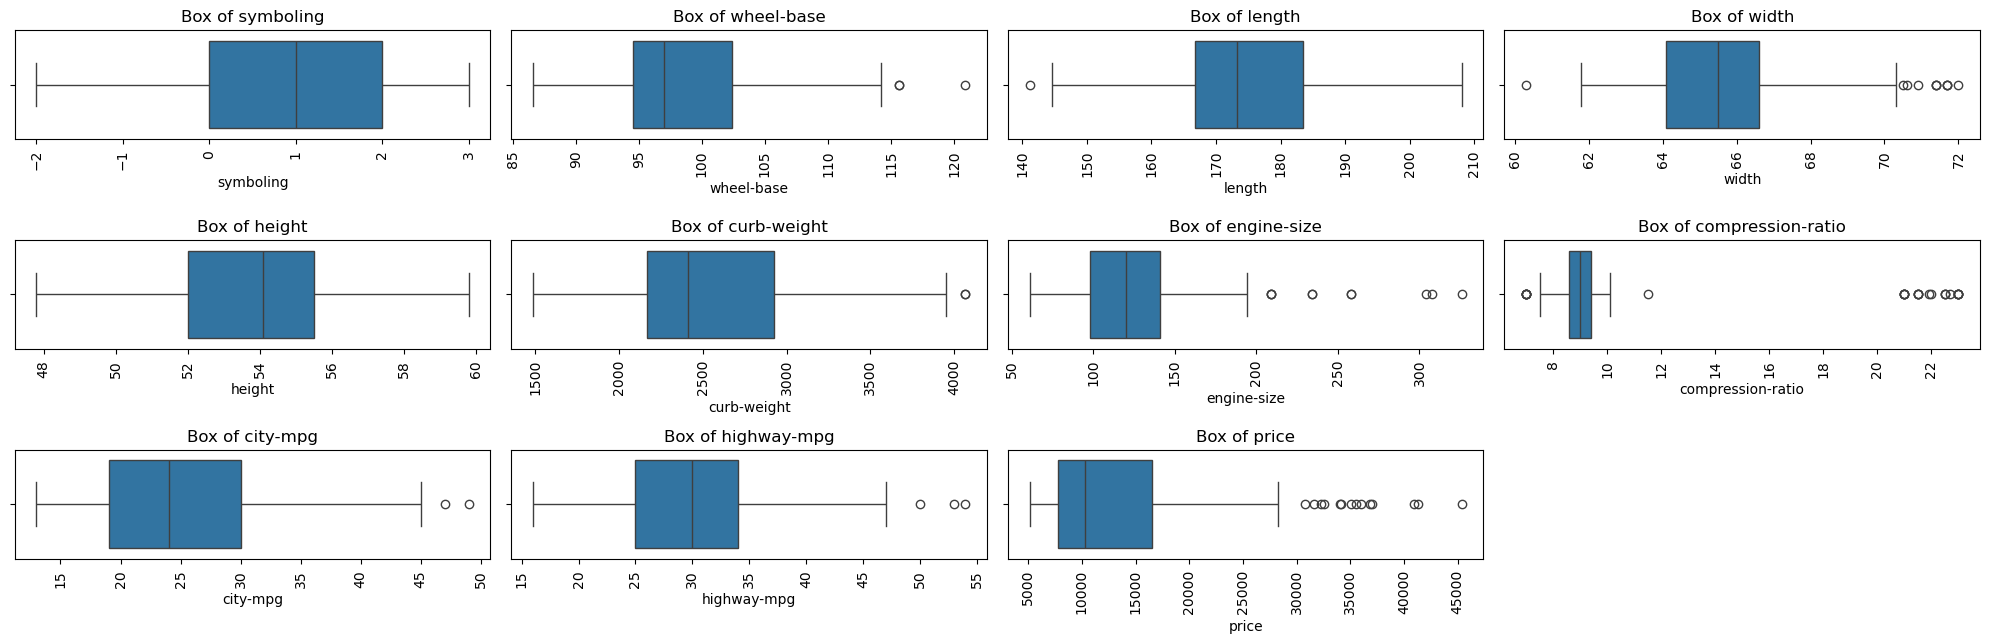

In [18]:
plt.figure(figsize=(20, 10))
plot = 1

for i in num_cols:   
    if plot <= 20:
        plt.subplot(5, 4, plot)
        sns.boxplot(x=i, data=df)   
        plt.title(f"Box of {i}")
        plt.xticks(rotation=90)       
        plot += 1

plt.tight_layout()
plt.show()

# *Insight*
- The risk factor, or symboling, generally remains in the range of average to considerable insurance risk.
- A few premium or large cars have extended wheelbases, while the majority of cars have normal wheelbases.
- The majority of cars are mid-sized, with small and luxury models being the exceptions.
- The majority of cars have standard width, although some (sports or luxury cars) are wider.
- Heights are standard for sedans and hatchbacks.
- The majority are light vehicles; the bulkier ones are probably luxury or high-performance vehicles.
- There are a few cars with exceptionally huge engines (sports/luxury), but small engines are the norm.
- Regular gasoline engines have standard compression; high ratios could be a sign of performance or diesel engines.
- Mid-size sedan average mileage; tiny, fuel-efficient vehicles are probably represented by high outliers.
- Although most cars are fuel-efficient, there are a few that have exceptionally high mileage.
- The majority of the cars in the dataset are mid-range or inexpensive, although a few high-end or sports models      raise the price range.

# ***Correlation Analysis***

# **Categorical Bivariate Analysis**

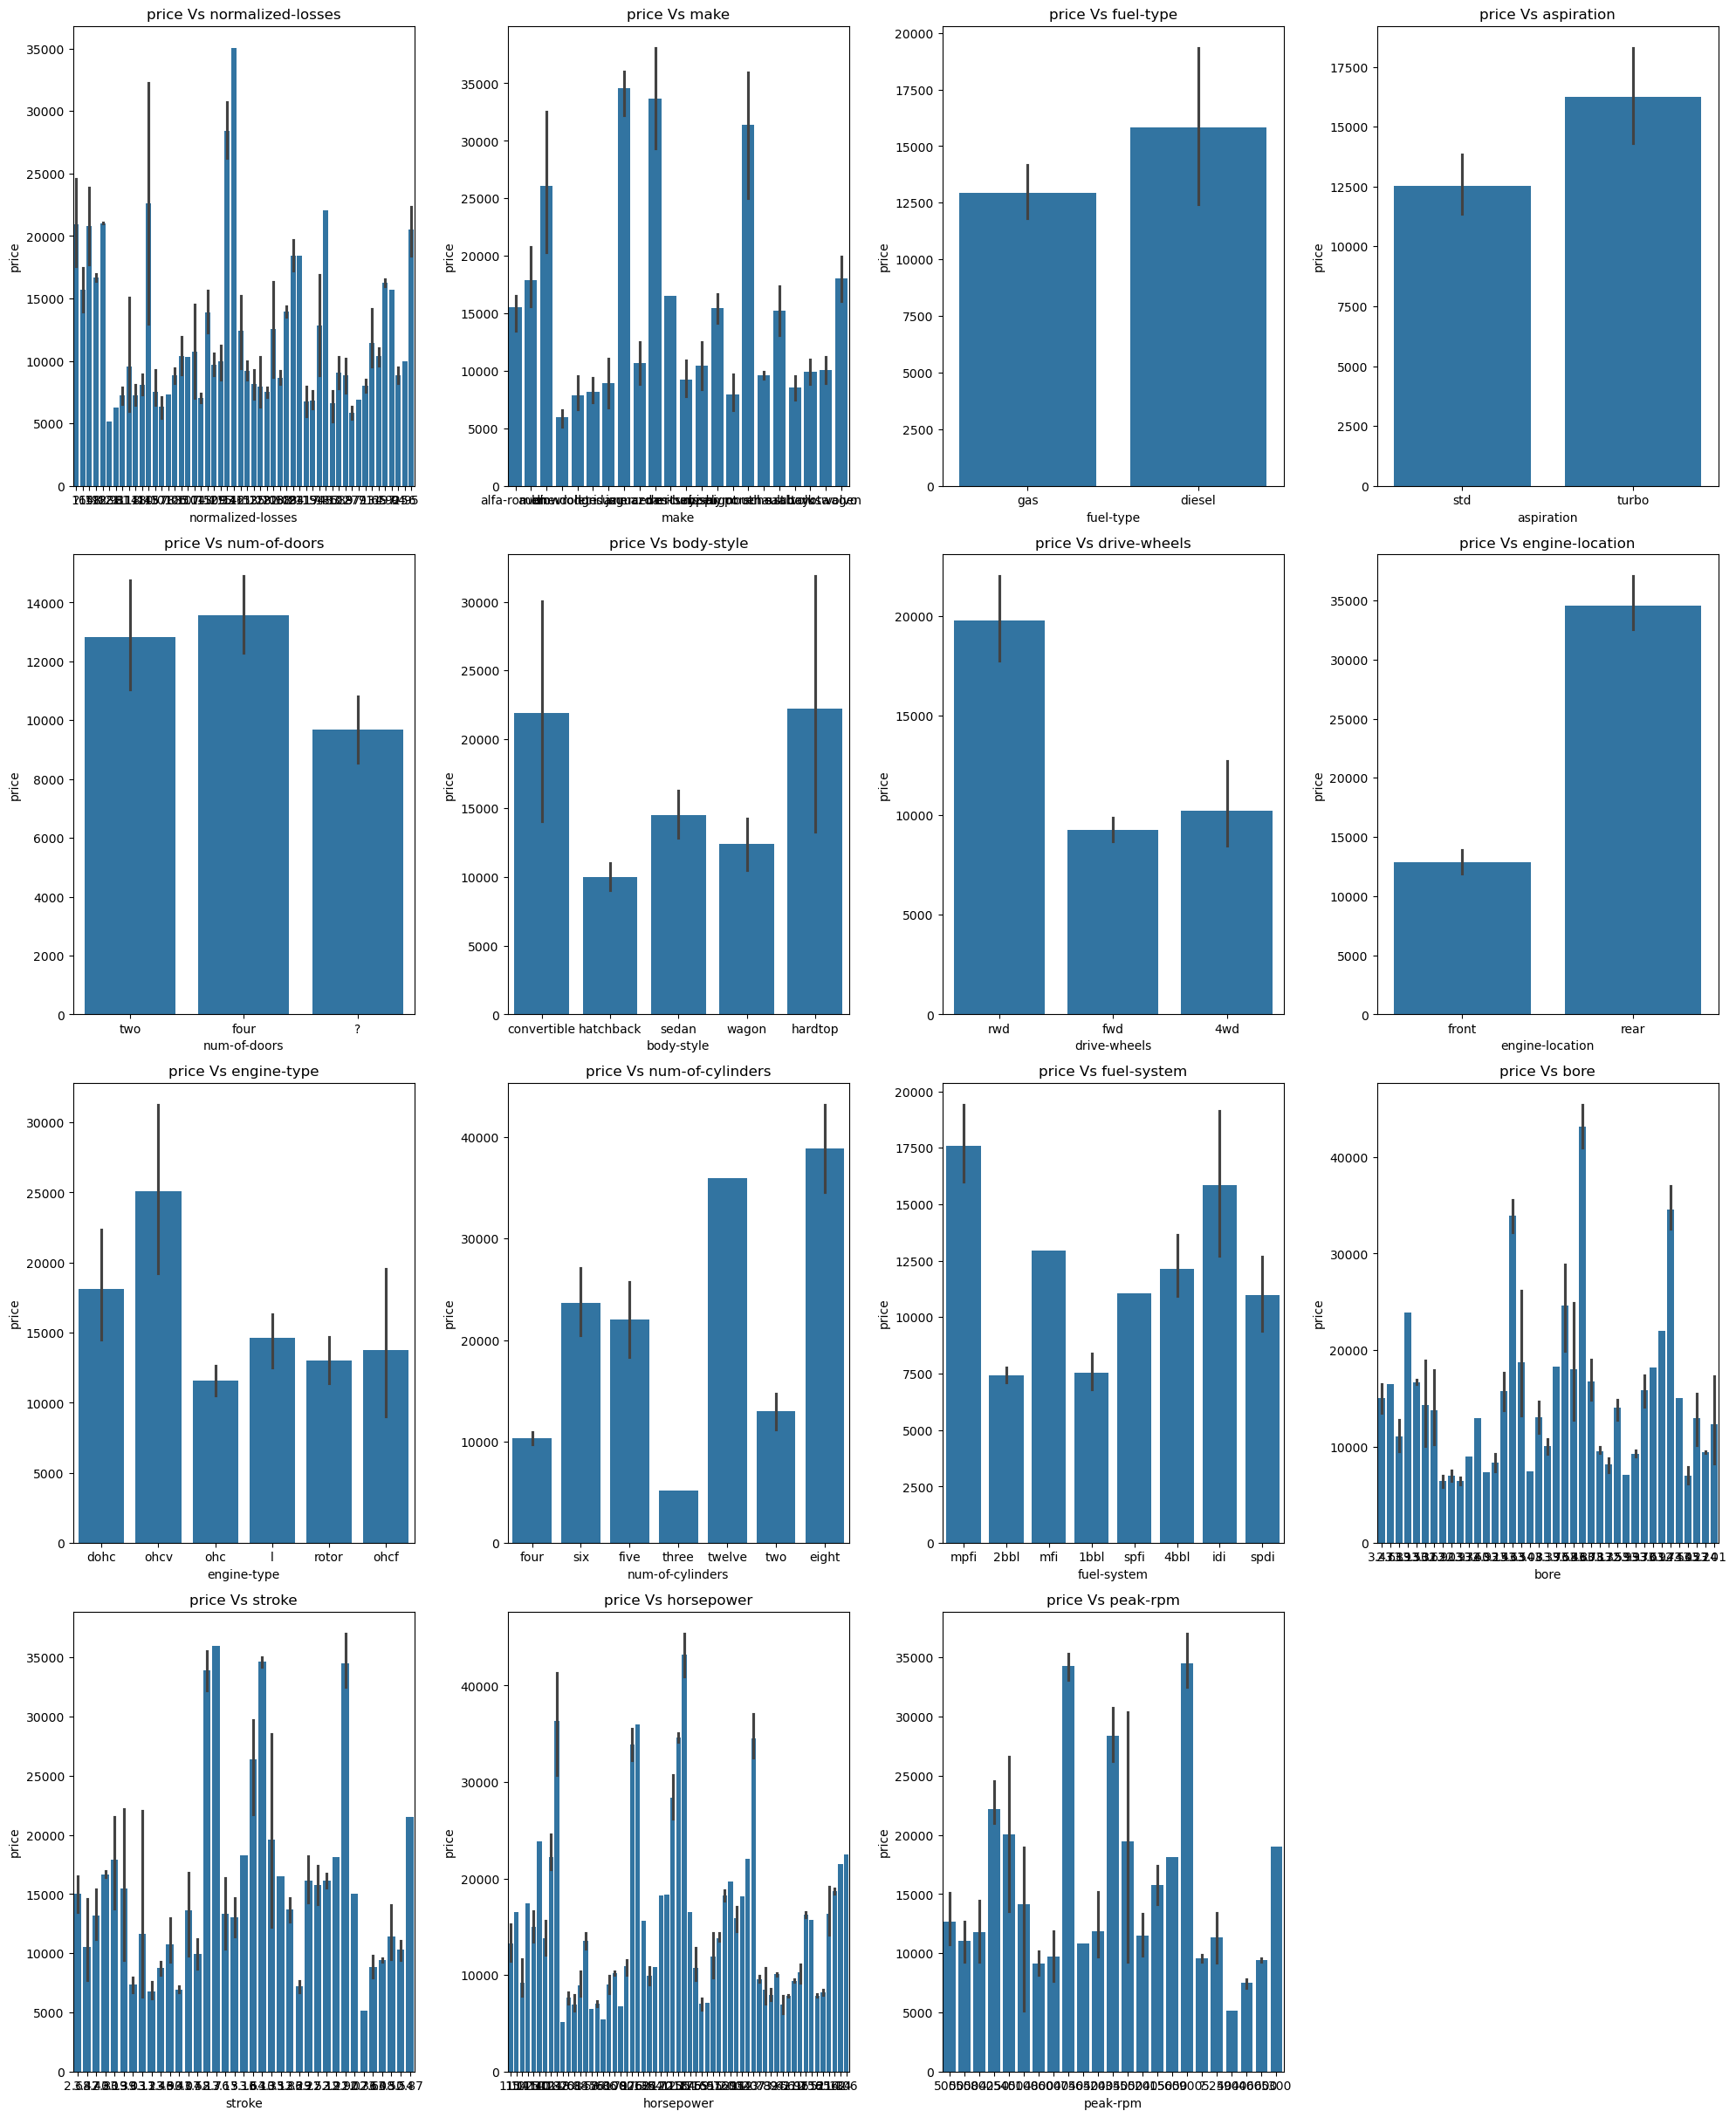

In [19]:
plt.figure(figsize=(20, 30))
plot = 1

for i in cat_cols:   
    if plot <= 18:
        plt.subplot(5, 4, plot)
        sns.barplot(x=i, y='price', data=df)
        plt.title(f"price Vs {i}")
        plot += 1

plt.tight_layout()
plt.show()

# *Insight*
- This feature may not have a significant impact on price due to the weak direct relationship.
- The brand of a car has a significant impact on its cost.  Prices are greater for premium brands.
- Diesel engines are more expensive because they are more durable and efficient.
- Turbocharged engines are more expensive yet are regarded as performance enhancements.
- Four-door vehicles are more affordable and geared toward families, while two-door vehicles might be sporty or       luxurious.
- Price is greatly influenced by body type; luxury and athletic types are more expensive.
- RWD automobiles are more expensive and are frequently sports or performance vehicles.
- Cars with rear engines, like Porsches, are expensive and uncommon.
- Higher prices are a result of advanced engine designs.
- The car's worth is directly increased by engine power.
- Higher costs and improved performance are associated with advanced fuel systems.
- Bore and stroke are secondary mechanical attributes, while horsepower is a significant determinant of cost.

# ***Multivariate Analysi***

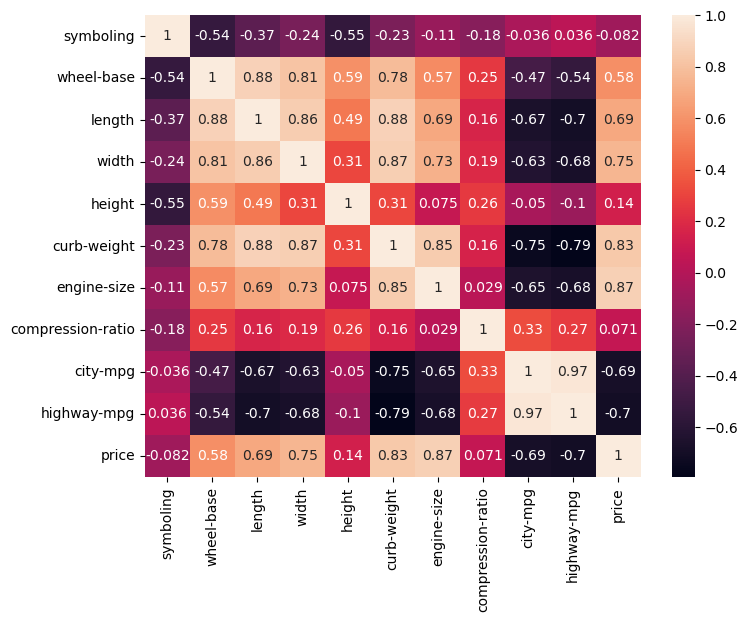

In [20]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.show()

# *insight*
- Increases in engine capacity, weight, width, length, and wheel base result in higher prices.
- When fuel efficiency (mpg) rises, prices fall.
- The best indicators of price:
   - Engine dimensions
   - Curb-weight
   - The width
   - Length
- The least significant factors are height, compression ratio, and symbolism.

# **Data preproccesing**

## ***Check for Missing Valuesn Or Replace***

In [21]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [22]:
df.replace("?",np.nan,inplace=True)
for col in df.columns:
    df[col]=pd.to_numeric(df[col],errors="ignore")


In [23]:
for col in df.select_dtypes("float64","int64").columns:
    df[col].fillna(df[col].mean(),inplace = True)

In [24]:
mode_value = df['num-of-doors'].mode()[0]
df['num-of-doors'].fillna(mode_value, inplace=True)

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


## **Chakcing Duplicate Rows**

In [26]:
df.duplicated().sum()

0

## **insigths**

- there is no duplicate values 

# **Remove Outliers**

In [27]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if col != 'price':  
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        df.loc[df[col] > upper_limit, col] = upper_limit
        df.loc[df[col] < lower_limit, col] = lower_limit
        print(f" Outliers capped for: {col}")

 Outliers capped for: symboling
 Outliers capped for: normalized-losses
 Outliers capped for: wheel-base
 Outliers capped for: length
 Outliers capped for: width
 Outliers capped for: height
 Outliers capped for: curb-weight
 Outliers capped for: engine-size
 Outliers capped for: bore
 Outliers capped for: stroke
 Outliers capped for: compression-ratio
 Outliers capped for: horsepower
 Outliers capped for: peak-rpm
 Outliers capped for: city-mpg
 Outliers capped for: highway-mpg


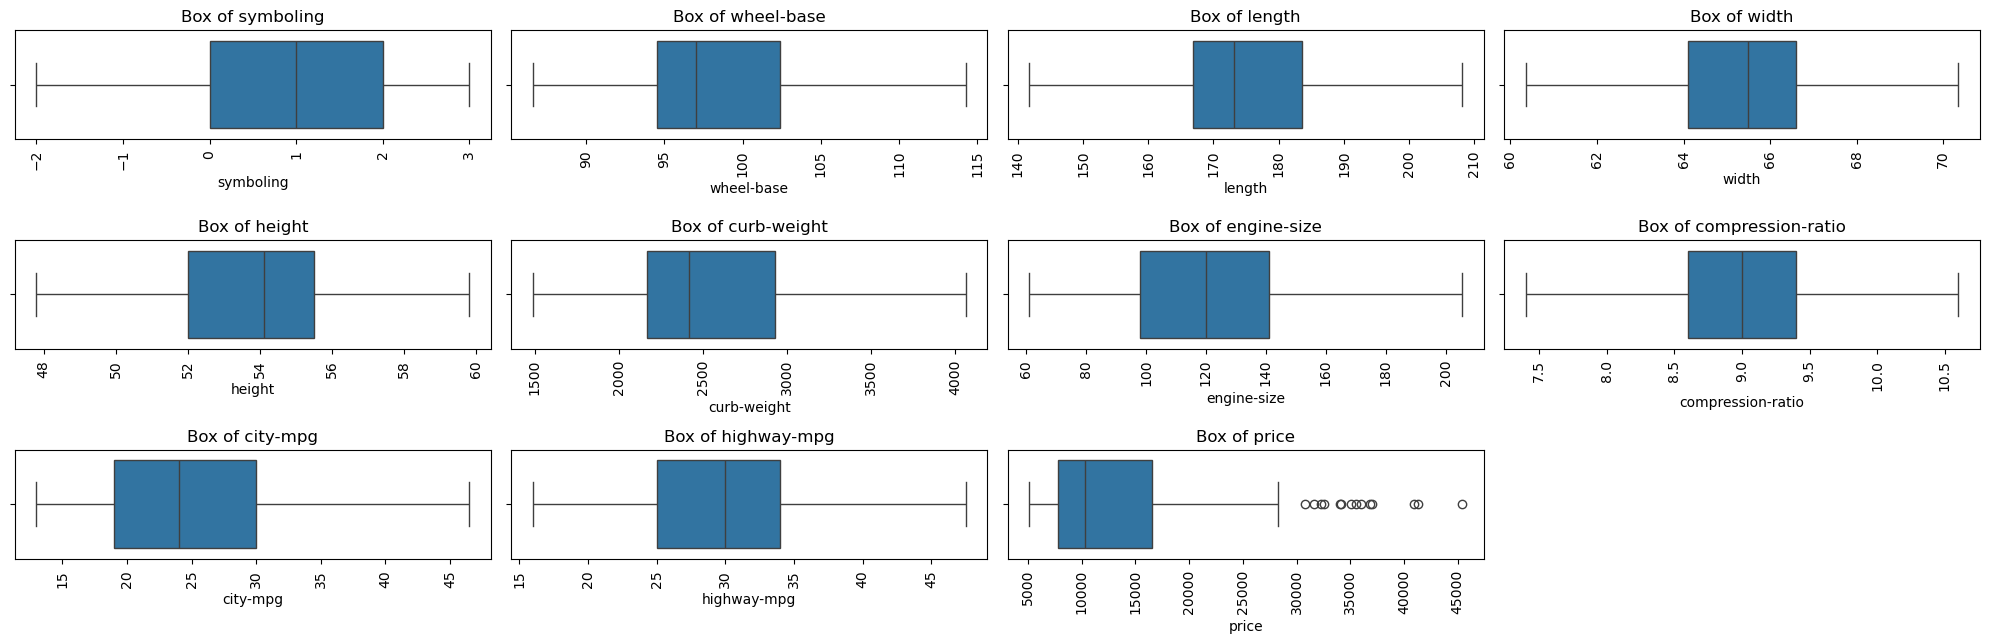

In [28]:
plt.figure(figsize=(20, 10))
plot = 1

for i in num_cols:   
    if plot <= 20:
        plt.subplot(5, 4, plot)
        sns.boxplot(x=i, data=df)   
        plt.title(f"Box of {i}")
        plt.xticks(rotation=90)       
        plot += 1

plt.tight_layout()
plt.show()

In [29]:
df.shape

(201, 26)

# **Categorical Columns Encoding**

In [30]:
df.shape

(201, 26)

In [31]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')


In [32]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450


In [33]:
pd.set_option('display.max_columns', None)

In [34]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')


In [35]:
lab_cols = ['fuel-type','aspiration','num-of-doors','engine-location','fuel-system']


# *lable encoding*

In [36]:
le = LabelEncoder()

for col in lab_cols:
    df[col] = df[col].astype(str)      
    df[col] = le.fit_transform(df[col])

# *One-Hot encoding*

In [37]:
onehot_cols = ['make','body-style','drive-wheels','engine-type',]

In [38]:
df = pd.get_dummies(df, columns=onehot_cols, dtype=int)

In [39]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,122.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,four,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,3,122.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,four,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,122.0,1,0,1,0,94.5,171.2,65.5,52.4,2823.0,six,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,2,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337.0,four,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,2,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824.0,five,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


# Ordinal encoding


In [40]:
ordinal_cols = [ 'num-of-cylinders']
cylinder_order =[['two','three','four','five','six','eight','twelve']]

In [41]:
cyl_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_map)
print(df[['num-of-cylinders']].head())

   num-of-cylinders
0                 4
1                 4
2                 6
3                 4
4                 5


In [42]:
df.shape

(201, 58)

In [43]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,122.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,3,122.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,122.0,1,0,1,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,2,164.0,1,0,0,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,2,164.0,1,0,0,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               201 non-null    int64  
 1   normalized-losses       201 non-null    float64
 2   fuel-type               201 non-null    int32  
 3   aspiration              201 non-null    int32  
 4   num-of-doors            201 non-null    int32  
 5   engine-location         201 non-null    int32  
 6   wheel-base              201 non-null    float64
 7   length                  201 non-null    float64
 8   width                   201 non-null    float64
 9   height                  201 non-null    float64
 10  curb-weight             201 non-null    float64
 11  num-of-cylinders        201 non-null    int64  
 12  engine-size             201 non-null    float64
 13  fuel-system             201 non-null    int32  
 14  bore                    201 non-null    fl

In [45]:
df.shape

(201, 58)

In [46]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
   

# Feature Selaction:

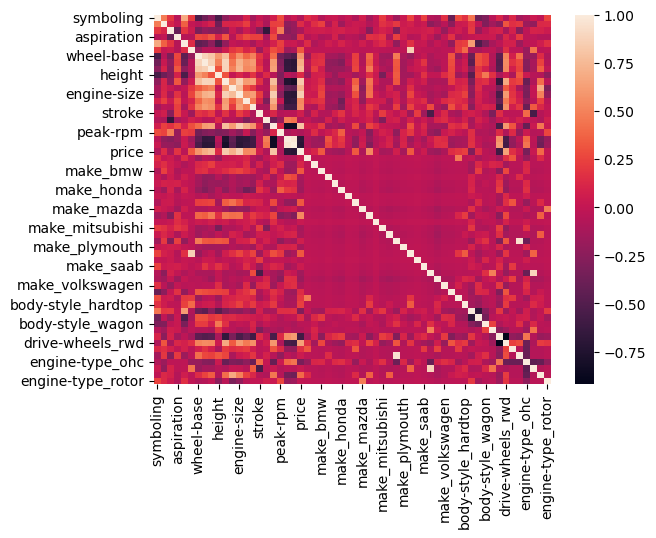

In [47]:
sns.heatmap(data = df.corr())
plt.show()

In [48]:
corr_matrix = df.corr()


high_corr = corr_matrix[abs(corr_matrix) >= 0.9]

high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']


high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1'] != high_corr_pairs['Column 2']]


high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', key=abs, ascending=False)

print(high_corr_pairs)

            Column 1          Column 2  Correlation
20          city-mpg       highway-mpg     0.966863
21       highway-mpg          city-mpg     0.966863
38       make_peugot     engine-type_l     0.954904
58     engine-type_l       make_peugot     0.954904
54  drive-wheels_fwd  drive-wheels_rwd    -0.919914
55  drive-wheels_rwd  drive-wheels_fwd    -0.919914


In [49]:
corr_with_target = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_target)

price                     1.000000
engine-size               0.849061
curb-weight               0.834400
horsepower                0.804629
width                     0.738159
num-of-cylinders          0.708645
length                    0.690846
drive-wheels_rwd          0.637522
wheel-base                0.573278
bore                      0.543154
make_mercedes-benz        0.524953
fuel-system               0.521689
engine-type_ohcv          0.394454
make_jaguar               0.332180
make_bmw                  0.331607
engine-location           0.331062
make_porsche              0.327029
body-style_hardtop        0.231180
body-style_convertible    0.192142
aspiration                0.179578
engine-type_dohc          0.156047
body-style_sedan          0.148105
make_volvo                0.147394
normalized-losses         0.140793
height                    0.135486
make_audi                 0.102938
make_peugot               0.069263
stroke                    0.065994
engine-type_l       

In [50]:
high_corr = corr_with_target[corr_with_target > 0.5]
print(high_corr)

price                 1.000000
engine-size           0.849061
curb-weight           0.834400
horsepower            0.804629
width                 0.738159
num-of-cylinders      0.708645
length                0.690846
drive-wheels_rwd      0.637522
wheel-base            0.573278
bore                  0.543154
make_mercedes-benz    0.524953
fuel-system           0.521689
Name: price, dtype: float64


In [51]:
df.drop(['engine-type_rotor', 'body-style_wagon', 'num-of-doors', 'make_renault',
    'make_isuzu', 'make_mercury', 'engine-type_ohcf', 'stroke', 'engine-type_l',
    'make_saab', 'make_alfa-romero', 'height', 'make_audi', 'make_peugot',
    'make_volkswagen', 'make_nissan', 'fuel-type', 'peak-rpm', 'symboling',
    'horsepower', 'highway-mpg'], axis=1, inplace=True)

# **Modeling**

# **Model Selection**

In [52]:
X =  df.drop("price", axis = 1)

In [53]:
X

,normalized-losses,aspiration,engine-location,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,compression-ratio,city-mpg,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_plymouth,make_porsche,make_subaru,make_toyota,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_ohc,engine-type_ohcv
0,122.0,0,0,88.60,168.80,64.10,2548.0,4,130.0,5,3.470000,9.00,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,122.0,0,0,88.60,168.80,64.10,2548.0,4,130.0,5,3.470000,9.00,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
2,122.0,0,0,94.50,171.20,65.50,2823.0,6,152.0,5,2.680000,9.00,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,164.0,0,0,99.80,176.60,66.20,2337.0,4,109.0,5,3.190000,10.00,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,164.0,0,0,99.40,176.60,66.40,2824.0,5,136.0,5,3.190000,8.00,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
5,122.0,0,0,99.80,177.30,66.30,2507.0,5,136.0,5,3.190000,8.50,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
6,158.0,0,0,105.80,192.70,70.35,2844.0,5,136.0,5,3.190000,8.50,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
7,122.0,0,0,105.80,192.70,70.35,2954.0,5,136.0,5,3.190000,8.50,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
8,158.0,1,0,105.80,192.70,70.35,3086.0,5,131.0,5,3.130000,8.30,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
9,191.0,0,0,101.20,176.80,64.80,2395.0,4,108.0,5,3.500000,8.80,23.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [54]:
y = df.price 

In [55]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
5      15250
6      17710
7      18920
8      23875
9      16430
10     16925
11     20970
12     21105
13     24565
14     30760
15     41315
16     36880
17      5151
18      6295
19      6575
20      5572
21      6377
22      7957
23      6229
24      6692
25      7609
26      8558
27      8921
28     12964
29      6479
30      6855
31      5399
32      6529
33      7129
34      7295
35      7295
36      7895
37      9095
38      8845
39     10295
40     12945
41     10345
42      6785
43     11048
44     32250
45     35550
46     36000
47      5195
48      6095
49      6795
50      6695
51      7395
52     10945
53     11845
54     13645
55     15645
56      8845
57      8495
58     10595
59     10245
60     10795
61     11245
62     18280
63     18344
64     25552
65     28248
66     28176
67     31600
68     34184
69     35056
70     40960
71     45400
72     16503
73      5389
74      6189
75      6669
76      7689

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [57]:
# Model implimention 

In [58]:
X_test

,normalized-losses,aspiration,engine-location,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,compression-ratio,city-mpg,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_plymouth,make_porsche,make_subaru,make_toyota,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_ohc,engine-type_ohcv
143,89.0,0,0,97.00,173.5,65.40,2455.0,4,108.0,5,3.620000,9.0,25.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
81,122.0,1,0,95.90,173.2,66.30,2926.0,4,156.0,6,3.590000,7.4,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
26,148.0,1,0,93.70,157.3,63.80,2191.0,4,98.0,5,3.030000,7.6,24.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
150,81.0,0,0,95.70,169.7,63.60,2290.0,4,92.0,1,3.050000,9.0,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
124,122.0,0,1,89.50,168.9,65.00,2756.0,6,194.0,5,3.740000,9.5,17.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
24,148.0,0,0,93.70,157.3,63.80,1989.0,4,90.0,1,2.970000,9.4,31.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
126,122.0,0,0,96.10,181.5,66.50,2579.0,4,132.0,5,3.460000,8.7,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
142,89.0,0,0,97.00,173.5,65.40,2290.0,4,108.0,1,3.620000,9.0,28.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
129,104.0,0,0,99.10,186.6,66.50,2695.0,4,121.0,5,3.540000,9.3,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
171,65.0,0,0,102.40,175.6,66.50,2414.0,4,122.0,5,3.310000,8.7,27.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [59]:
y_test

143    10198
81     14489
26      8558
150     7898
124    34028
24      6692
126     9295
142     7463
129    12170
171     9988
72     16503
97      9549
21      6377
67     31600
106    12440
178     7775
111    17075
63     18344
93      7499
191    13415
86      5499
158     9258
133    18620
50      6695
99     14399
200    22625
190    12940
101    17199
100    13499
103    18399
139     9960
57      8495
36      7895
114    18150
54     13645
25      7609
1      16500
149     6918
194    18420
121    12764
125    37028
Name: price, dtype: int64

# **Model Implimantetion**

# **Linear Regresion**

In [60]:
models = {"Linear Regression" : LinearRegression()}

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print("----- Regression Report -----")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print("------------------------------")

for name , model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(f"\n=========== {name} ==============")
    regression_report(y_test,y_pred)


=========== Linear Regression ==============
----- Regression Report -----
Mean Absolute Error (MAE): 1941.25
Mean Squared Error (MSE): 6434389.47
Root Mean Squared Error (RMSE): 2536.61
R² Score: 0.8770
------------------------------


# **XGBoosting**

In [61]:
xgb = XGBRegressor(
    n_estimators=300,         # number of boosting rounds
    learning_rate=0.05,       # step size shrinkage
    max_depth=6,              # depth of each tree
    subsample=0.8,            # fraction of training samples
    colsample_bytree=0.8,     # fraction of features used per tree
    random_state=42,
    reg_lambda=1,             # L2 regularization term
    n_jobs=-1                 # use all CPU cores
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test) # Make predictions

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("XGBoost Regression Performance:")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

XGBoost Regression Performance:
R² Score: 0.9077854156494141
Mean Absolute Error: 1725.4458484184452
Root Mean Squared Error: 2196.411794323597


# **SVR suport vector regressor**

In [62]:

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_scaled = svr.predict(X_test)
r2 = r2_score(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)

print("Support Vector Regression Performance:")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

NameError: name 'y_test_original' is not defined

# **Gradianboosting regressior**

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=300,        # number of boosting stages
    learning_rate=0.05,      # step size shrinkage
    max_depth=4,             # depth of individual regression estimators
    subsample=0.8,           # fraction of samples used for fitting
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Gradient Boosting Regression Performance:")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# **Random Forest Regressior**

In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=None,         # tree depth (None = until pure)
    min_samples_split=2,    # minimum samples to split
    min_samples_leaf=1,     # minimum samples at a leaf
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)     # Make predictions

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Random Forest Regression Performance:")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")